In [1]:
import geopandas as gpd
import numpy as np
import pandas as pd
from shapely.geometry import Point
import osmnx as ox

import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    import aup

/home/edgar/anaconda3/envs/geo_env/lib/python3.8/site-packages/geopandas/_compat.py:111: UserWarning: The Shapely GEOS version (3.10.1-CAPI-1.16.0) is incompatible with the GEOS version PyGEOS was compiled with (3.9.1-CAPI-1.14.2). Conversions between both will be slow.
  warnings.warn(


In [2]:
df = pd.read_json("../scripts/Metropolis_CVE.json")

In [25]:
hex_bins = gpd.GeoDataFrame()
hex_folder = 'hex_bins_pop_2020'
c = 'ZMVM'
# Iterates over municipality codes for each metropolitan area or capital
for i in range(len(df.loc["mpos", c])):
    # Extracts specific municipality code
    m = df.loc["mpos", c][i]
    # Downloads municipality polygon according to code
    query = f"SELECT * FROM censo.{hex_folder} WHERE \"CVEGEO\" LIKE \'{m}%%\'"
    hex_bins = hex_bins.append(aup.gdf_from_query(query, geometry_col='geometry'))

In [26]:
print(hex_bins.shape)
hex_bins.head(2)

(3767, 225)


,geometry,hex_id_8,CVEGEO,pobtot,pobfem,pobmas,p_0a2,p_0a2_f,p_0a2_m,p_3ymas,...,vph_telef,vph_cel,vph_inter,vph_stvp,vph_spmvpi,vph_cvj,vph_sinrtv,vph_sintlc,vph_sincint,vph_sintic
0,"POLYGON ((-99.17740 19.48241, -99.17776 19.487...",884995b8c1fffff,09002,14474.150,7629.7427,6844.4077,397.1297,201.98712,195.14255,14076.893,...,3291.8496,4331.3076,3775.7168,2321.447,1888.8503,1201.4825,62.35107,83.08192,683.6730,5.065773
1,"POLYGON ((-99.15333 19.47646, -99.15369 19.481...",884995b817fffff,09002,11224.782,5932.0500,5292.7334,290.3793,139.58163,150.79770,10822.335,...,2236.9870,3080.4670,2551.8333,1594.311,1102.6494,662.1067,32.58291,79.75566,665.7047,8.809484


In [27]:
hex_bins.pobtot.sum()

20996445.9109602

In [28]:
hex_bins = hex_bins.to_crs("EPSG:32614")

In [29]:
hex_bins['dens_pobha'] = hex_bins.pobtot / (hex_bins.area/10000)

<AxesSubplot:>

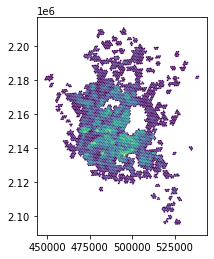

In [30]:
hex_bins.plot('dens_pobha', 'viridis')

In [31]:
hex_bins_10 = gpd.GeoDataFrame()

hex_folder = 'hex_bins_pop_2010'

for i in range(len(df.loc["mpos", c])):
    # Extracts specific municipality code
    m = df.loc["mpos", c][i]
    # Downloads municipality polygon according to code
    query = f"SELECT * FROM censo.{hex_folder} WHERE \"CVEGEO\" LIKE \'{m}%%\'"
    hex_bins_10 = hex_bins_10.append(aup.gdf_from_query(query, geometry_col='geometry'))

In [32]:
print(hex_bins_10.shape)
hex_bins_10.head(2)

(3686, 193)


,geometry,hex_id_8,CVEGEO,pobtot,pobmas,pobfem,p_0a2,p_0a2_m,p_0a2_f,p_3ymas,...,vph_snbien,vph_radio,vph_tv,vph_refri,vph_lavad,vph_autom,vph_pc,vph_telef,vph_cel,vph_inter
0,"POLYGON ((-99.17740 19.48241, -99.17776 19.487...",884995b8c1fffff,09002,14620.1660,6851.2324,7768.9350,516.29626,257.641300,258.654900,13884.6800,...,2.118699,3996.00000,4193.96400,3992.84030,3437.3975,1876.21890,2331.57930,3196.77220,3404.1099,68440.0
1,"POLYGON ((-99.17884 19.50300, -99.17848 19.497...",884995b88dfffff,09002,1322.2435,634.7679,687.4756,67.84711,36.566658,30.795612,1240.3895,...,0.000000,316.32776,337.11166,315.69006,273.3502,140.18404,151.70692,229.29893,261.7818,1971.0


In [33]:
hex_bins_10.pobtot.sum()

19423565.6248095

In [34]:
hex_bins_10 = hex_bins_10.to_crs("EPSG:32614")

In [35]:
hex_bins_10['dens_pobha'] = hex_bins_10.pobtot / (hex_bins_10.area/10000)

<AxesSubplot:>

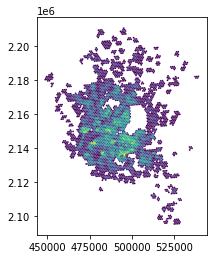

In [36]:
hex_bins_10.plot('dens_pobha', 'viridis')

In [37]:
hex_bins_10 = hex_bins_10[['hex_id_8','pobtot','vivtot','tvivparhab','vivpar_des','ocupvivpar','prom_ocup']].copy()

In [38]:
hex_bins_10 = hex_bins_10.add_prefix('10_')

In [39]:
hex_bins_10.head(2)

,10_hex_id_8,10_pobtot,10_vivtot,10_tvivparhab,10_vivpar_des,10_ocupvivpar,10_prom_ocup
0,884995b8c1fffff,14620.1660,4915.97170,4326.72850,402.86720,14342.2890,3.381128
1,884995b88dfffff,1322.2435,740.65454,346.94568,378.88745,1307.1647,3.826977


In [40]:
hex_bins_10.rename(columns={'10_hex_id_8':'hex_id_8'}, inplace=True)

In [41]:
hex_mrg = hex_bins.merge(hex_bins_10, on='hex_id_8', how='left')
print(hex_mrg.shape)
hex_mrg.head(2)

(3767, 232)


,geometry,hex_id_8,CVEGEO,pobtot,pobfem,pobmas,p_0a2,p_0a2_f,p_0a2_m,p_3ymas,...,vph_sintlc,vph_sincint,vph_sintic,dens_pobha,10_pobtot,10_vivtot,10_tvivparhab,10_vivpar_des,10_ocupvivpar,10_prom_ocup
0,"POLYGON ((481383.577 2154216.063, 481346.266 2...",884995b8c1fffff,09002,14474.150,7629.7427,6844.4077,397.1297,201.98712,195.14255,14076.893,...,83.08192,683.6730,5.065773,170.613739,14620.166,4915.9717,4326.7285,402.86720,14342.289,3.381128
1,"POLYGON ((483908.276 2153555.715, 483870.991 2...",884995b817fffff,09002,11224.782,5932.0500,5292.7334,290.3793,139.58163,150.79770,10822.335,...,79.75566,665.7047,8.809484,132.338941,13237.348,4207.1143,3775.5078,315.58203,12741.941,3.537866


In [42]:
hex_mrg_10_20 = hex_mrg.copy()

In [43]:
hex_mrg_10_20.replace(np.nan, 0, inplace=True)

In [44]:
hex_mrg_10_20['T_Pob_10_20'] = hex_mrg_10_20['pobtot'] - hex_mrg_10_20['10_pobtot']
hex_mrg_10_20['T_Viv_10_20'] = hex_mrg_10_20['vivtot'] - hex_mrg_10_20['10_vivtot']
hex_mrg_10_20['R_TViv_10_20'] = (hex_mrg_10_20['vivtot'] - hex_mrg_10_20['10_vivtot']) / hex_mrg_10_20['10_vivtot']
hex_mrg_10_20['T_VivDes_10_20'] = hex_mrg_10_20['vivpar_des'] - hex_mrg_10_20['10_vivpar_des']
hex_mrg_10_20['R_TVivDes_10_20'] = (hex_mrg_10_20['vivpar_des'] - hex_mrg_10_20['10_vivpar_des']) / hex_mrg_10_20['10_vivpar_des']
hex_mrg_10_20['Z_RTVivDes_10_20'] = (hex_mrg_10_20['R_TVivDes_10_20']-hex_mrg_10_20['R_TVivDes_10_20'].mean()) / hex_mrg_10_20['R_TVivDes_10_20'].std()
hex_mrg_10_20['Z_RTViv_10_20'] = (hex_mrg_10_20['R_TViv_10_20']-hex_mrg_10_20['R_TViv_10_20'].mean()) / hex_mrg_10_20['R_TViv_10_20'].std()
hex_mrg_10_20['R_VivHab_20'] = hex_mrg_10_20['tvivparhab'] / hex_mrg_10_20['vivtot']
hex_mrg_10_20['R_VivDes_20'] = hex_mrg_10_20['vivpar_des'] / hex_mrg_10_20['vivtot']
hex_mrg_10_20['Z_RVivHab_20'] = (hex_mrg_10_20['R_VivHab_20'] - hex_mrg_10_20['R_VivHab_20'].mean()) / hex_mrg_10_20['R_VivHab_20'].std()
hex_mrg_10_20['R_VivHab_10'] = hex_mrg_10_20['10_tvivparhab'] / hex_mrg_10_20['10_vivtot']
hex_mrg_10_20['Z_RVivHab_10'] = (hex_mrg_10_20['R_VivHab_10'] - hex_mrg_10_20['R_VivHab_10'].mean()) / hex_mrg_10_20['R_VivHab_10'].std()
hex_mrg_10_20['Chng_RVivHab_10'] = hex_mrg_10_20['R_VivHab_20'] - hex_mrg_10_20['R_VivHab_10']

<AxesSubplot:>

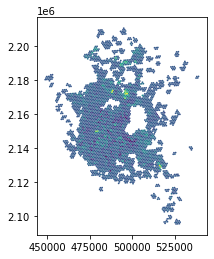

In [45]:
hex_mrg_10_20.plot('T_Pob_10_20')

In [46]:
hex_mrg_10_20.to_file(f'/home/edgar/SIG/ObsCds/Proyectos/Vivienda_Deshabitada/Info_Sociodemografica/Analisis/Hexbins_{c}_AnalisisVivienda_OC22_UTM_v1.geojson')